### Проект: Статистический анализ данных

### Описание проекта

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

1) без подписки
- абонентская плата отсутствует;
- стоимость одной минуты поездки — 
8 рублей;

- стоимость старта (начала поездки) — 
50 рублей;
2) с подпиской Ultra
- абонентская плата — 
199 рублей в месяц;

- стоимость одной минуты поездки — 
6 рублей;
- стоимость старта — бесплатно.

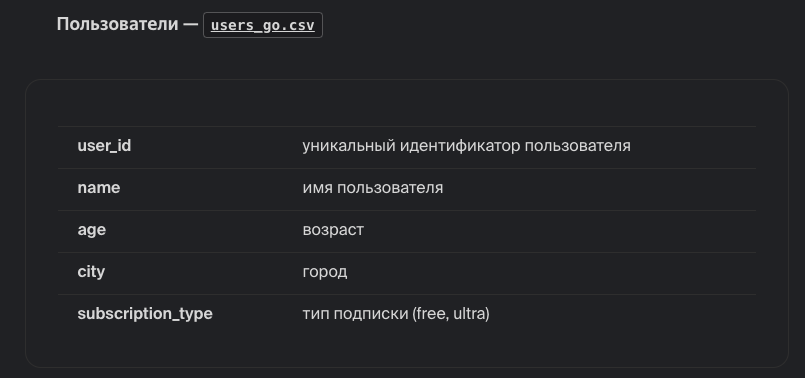

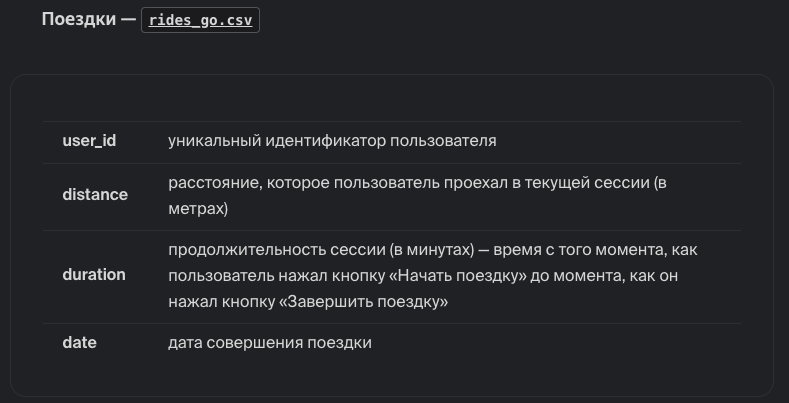

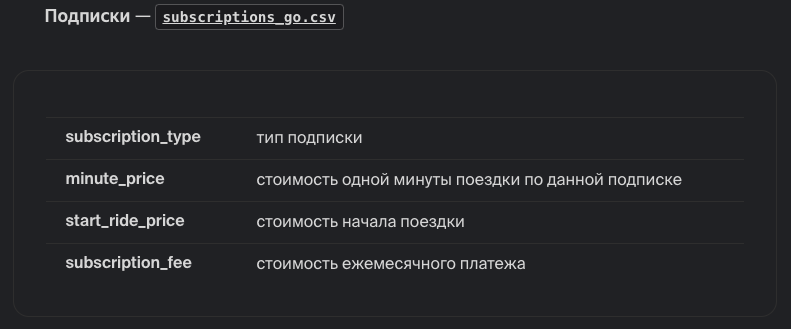

In [1]:
import pandas as pd

#### Шаг 1. Загрузка данных

In [2]:
# закомментить строку для ревьюера (пути к файлам с данными изменятся)
"""
url_users = '/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/users_go.csv'
url_rides = '/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/rides_go.csv'
url_sub = '/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/subscriptions_go.csv'

"""

In [ ]:
# разкомментить строку для ревьюера - пути файла как в тренажере
url_users = '/datasets/users_go.csv'
url_rides = '/datasets/rides_go.csv'
url_sub = '/datasets/subscriptions_go.csv'



In [3]:
users_df = pd.read_csv(url_users)
rides_df = pd.read_csv(url_rides)
subscriptions_df = pd.read_csv(url_sub)

Смотрим наполнение данных, их размер, чем заполнены, статистическую информацию

1) Данные о пользователях

In [4]:
users_df.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [6]:
users_df.shape

(1565, 5)

In [5]:
users_df.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [7]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


2) Данные о поездках

In [8]:
rides_df.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [9]:
rides_df.shape

(18068, 4)

In [10]:
rides_df.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [12]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


3) Данные о типах подписки

In [14]:
subscriptions_df

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


#### Шаг 2. Предобработка данных

Судя по типам данных, заполненности данных (пустых значений нет) -  все в целом неплохо.

1) поменяем тип данных в столбце date таблицы rides_df на datetime 

In [23]:
rides_df.date = rides_df.date.astype('datetime64')

In [24]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


2) добавим новый столбец с номером месяца

In [29]:
rides_df['month'] = rides_df.date.apply(lambda x: x.month)

In [30]:
rides_df.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


3. Пропущенных значений нет (смотрел выше), поищем дубликаты

3.1. Данные о пользователях 

In [32]:
users_df.duplicated().sum()

31

так, 31 явный дубликат. удалим их все


In [36]:
users_df.drop_duplicates(inplace=True)

In [37]:
users_df.duplicated().sum()

0

In [39]:
users_df.shape

(1534, 5)

Неявные дубликаты для этой таблицы не представляю, идем дальше

3.2. Данные о поездках

In [42]:
rides_df.duplicated().sum()

0

Явных дубликатов нет, неявные - невозможны. 


<font color='red'>Вывод:</font>  

1) дубликаты обнаружены только в таблице о пользователях, почищены. 
2) в таблице поездок - отсутствуют
3) в таблице описания типов  - невозможны (всего две строки)

#### Шаг 3. Исследовательский анализ данных

Опишем и визуализируем данные

##### 3.1 частота встречаемости городов;

In [46]:
# импортируем библиотеку для построения графиков
import matplotlib.pyplot as plt

<AxesSubplot: >

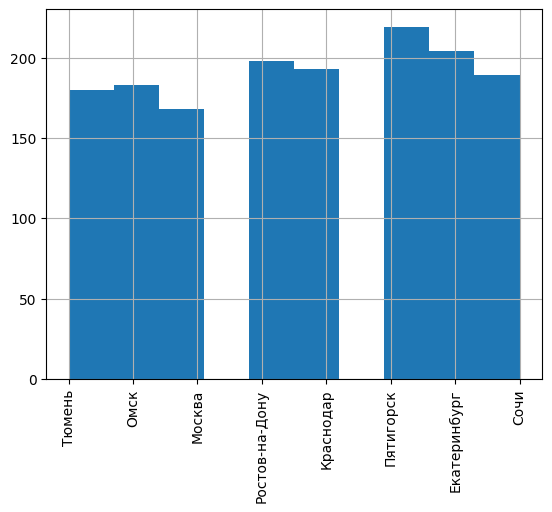

In [52]:
users_df.city.hist(xrot=90)

Чаще всего встречаются Пятигорск и Екатеринбург (более 200 пользователей), далее Ростов и Краснодар (чуть меньше 200), меньше всего почему-то в Москве

In [55]:
users_df.groupby('city').agg({'user_id': 'count'})\
    .rename(columns={'user_id':'amount'}).sort_values('amount', ascending=False)                    

,amount
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


##### 3.2 соотношение пользователей с подпиской и без подписки;

In [58]:
users_df.subscription_type.value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

Пользователей без подписки 54% , с подпиской - 46%

##### 3.3 возраст пользователей;

In [62]:
users_df.age.unique()

array([22, 31, 20, 26, 28, 25, 23, 21, 18, 27, 24, 29, 32, 14, 19, 30, 17,
       12, 35, 33, 13, 15, 37, 16, 34, 38, 36, 39, 43])

я бы дополнительно разбил на три группы:
- подростки (до 18)
- молодежь (18-30)
- старше 30

и посмотрел распределение по этим трем группам

In [64]:
def groupped_age(age):
    if age <18: return 'подросток'
    elif 18<= age <30: return 'молодежь'
    else: return 'старше_30'

In [65]:
users_df['age_group'] = users_df.age.apply(groupped_age)

In [66]:
users_df.head()

,user_id,name,age,city,subscription_type,age_group
0,1,Кира,22,Тюмень,ultra,молодежь
1,2,Станислав,31,Омск,ultra,старше_30
2,3,Алексей,20,Москва,ultra,молодежь
3,4,Константин,26,Ростов-на-Дону,ultra,молодежь
4,5,Адель,28,Омск,ultra,молодежь


<AxesSubplot: >

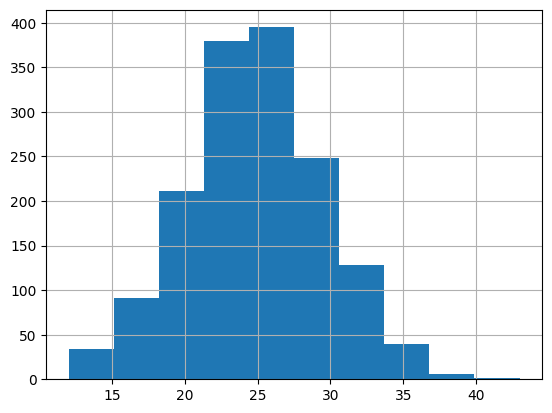

In [67]:
users_df.age.hist()

видно, что большинство пользователей - между 22 и 27 годами

<AxesSubplot: >

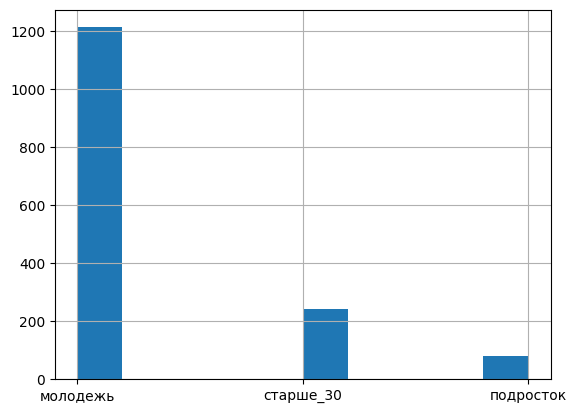

In [68]:
users_df.age_group.hist()

Причем, подавляющее число пользователей - молодежь в возрасте от 18 до 30

##### 3.4 расстояние, которое пользователь преодолел за одну поездку;

<AxesSubplot: >

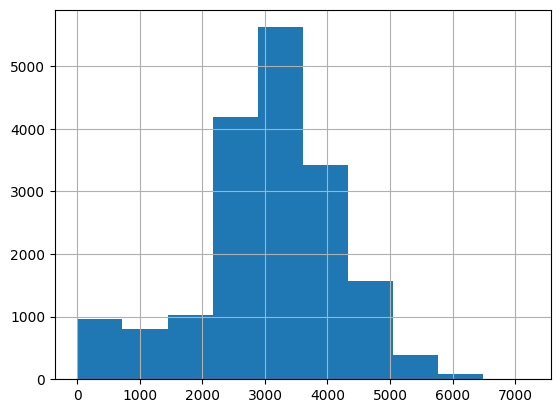

In [70]:
rides_df.distance.hist()

Посмотрим поближе на самые частые поездки

<AxesSubplot: >

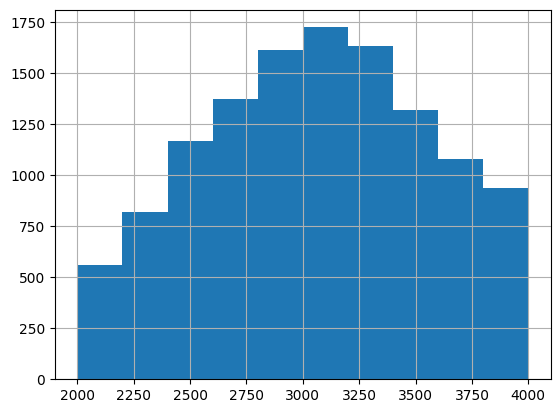

In [71]:
rides_df.distance.hist(range= (2000,4000))

Вывод: основная масса людей проезжает от 2.3 до 4 км, заметно реже люди берут самокат для коротких прогулок (до 2 км), и совсем редко люди использую самокаты для поездок больше 4 км

##### 3.5 продолжительность поездок

<AxesSubplot: >

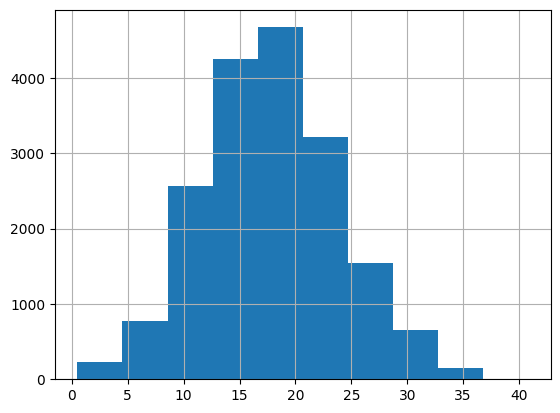

In [72]:
rides_df.duration.hist()

Рассмотрим поближе

<AxesSubplot: >

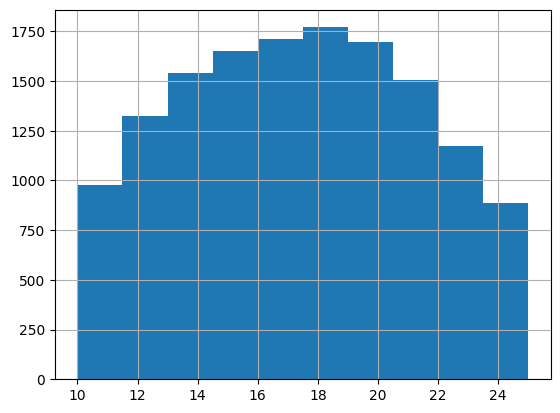

In [75]:
rides_df.duration.hist(range = (10, 25))

Вывод: основная масса людей берут самокат на 11 - 22 минуты

##### <font color='red'>Общий вывод:</font>

1) Большинство пользователей в Екатеринбурге и Пятигорске, меньше всего - в Москве. Стоит задуматься об увеличении числа самокатов или рекламе/продвижении сервиса в столице

2) Ползователей без подписки немного больше - стоит привлекать дополнительных лояльных клиентов. Возможно, скидки или выгодные тарифы. Сделать рассылку, описать преимущества. Проводить акции "приведи друга" для тех, кто уже владеет подпиской

3) Возраст пользователей - ожидаемо, молодежь от 18 до 30. Причем, основная масса - от 22 до 27. Возмонжо, стоит поработать с пограничниками от 18 до 22 и от 27 до 30. А также задуматься как привлечь людей постарше (выше платежеспособность, чем у подростков).

4) длительность дистанций - чаще всего в пределах 2-4 км. Время использования - чаще всего от 11 до 22 минут. Величины однозначно взаимосвязаны. Как вариант - подумать над тарифами более длительного использования (или при достижении большого расстояния) - например, снижать стоимость использования с 20 минуты, повышая желание пользователя продолжать использование самоката. По расстоянию: более 4 км - снижать стоимость


#### Шаг 4. Объединение данных

##### Объединим данные о пользователях, поездках и подписках в один датафрейм. 

In [78]:
all_in_one =  users_df.merge(rides_df, how='right', on='user_id')\
    .merge(subscriptions_df, how='left', on='subscription_type')

In [79]:
all_in_one.head()

,user_id,name,age,city,subscription_type,age_group,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,молодежь,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,молодежь,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,молодежь,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,молодежь,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,молодежь,4028.687306,26.265803,2021-08-28,8,6,0,199


In [81]:
all_in_one.shape

(18068, 13)

Отлично, данные не потеряли

##### Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:

- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [84]:
with_subscriptions = all_in_one[all_in_one.subscription_type == 'ultra']

In [85]:
without_subscriptions = all_in_one[all_in_one.subscription_type == 'free']

In [86]:
with_subscriptions.head()

,user_id,name,age,city,subscription_type,age_group,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,молодежь,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,молодежь,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,молодежь,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,молодежь,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,молодежь,4028.687306,26.265803,2021-08-28,8,6,0,199


In [87]:
with_subscriptions.shape

(6500, 13)

In [88]:
without_subscriptions.head()

,user_id,name,age,city,subscription_type,age_group,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,молодежь,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,молодежь,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,молодежь,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,молодежь,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,молодежь,3047.379435,17.427673,2021-02-14,2,8,50,0


In [89]:
without_subscriptions.shape

(11568, 13)

проверим, что не потеряли данные

In [90]:
without_subscriptions.shape[0] + with_subscriptions.shape[0]

18068

да, все данные на месте

##### 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

<AxesSubplot: >

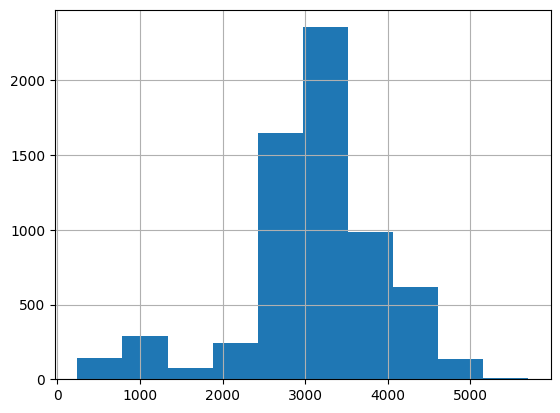

In [91]:
with_subscriptions.distance.hist()

<AxesSubplot: >

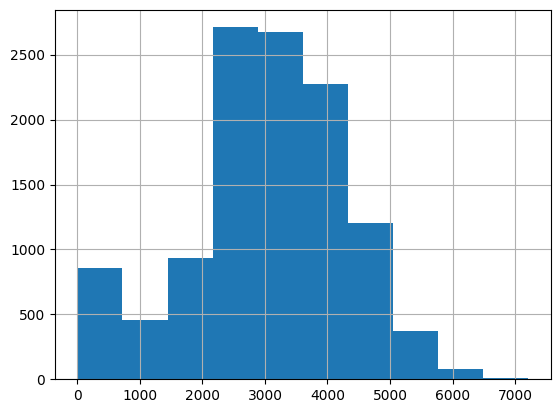

In [92]:
without_subscriptions.distance.hist()

Интересная информация. 

Сходу видно, что пользователи без подписки чаще проезжают большее расстояние, чем пользователи с подпиской.

Первые берут самокат для поездок от 2.1 до 4.2 км, а  вторые -  от 2.5 до 3.5 км 

Смотрим как распределено время использования

<AxesSubplot: >

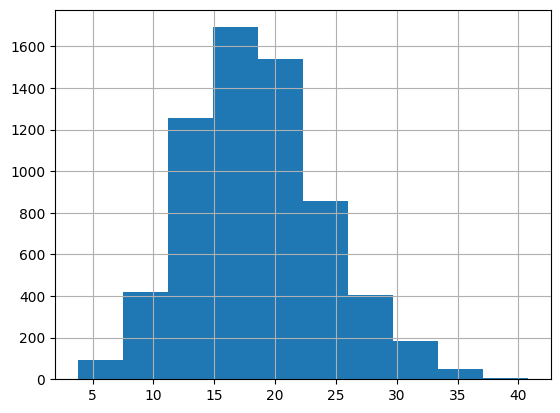

In [93]:
with_subscriptions.duration.hist()

<AxesSubplot: >

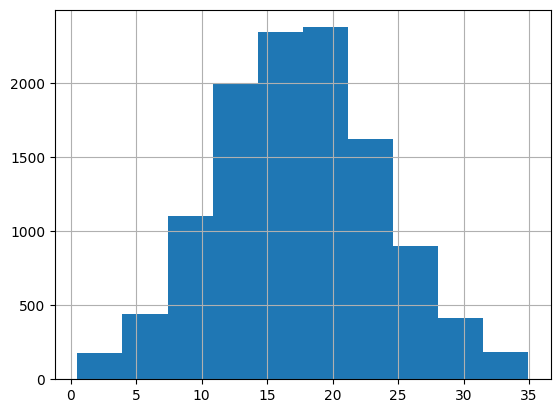

In [94]:
without_subscriptions.duration.hist()

Зато время использования в среднем примерно одинаковое - от 12 до 22 минут для обеих категорий

##### <font color='red'>Общий вывод:</font>

1) Длительность поездок в среднем одинакова для обоих групп - с подпиской и без примерно 12-22 минут
2) Дальность поездок у пользователей без подписки немного выше - до 4 км против 3.5 км у пользователей с подпиской

#### Шаг 5. Подсчёт выручки

##### Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [145]:
import numpy as np

In [148]:
users_total_df =  all_in_one.groupby(['user_id', 'month']).agg({'distance':'sum', 'date':'count', 'duration': 'sum'}).\
    reset_index().\
    rename(columns={'distance': 'tot_dist', 'date': 'tot_rides', 'duration': 'tot_duration'}).\
    astype({'tot_dist':'int'})
    

In [151]:
users_total_df.tot_duration = np.ceil(users_total_df.tot_duration).astype(int)

In [152]:
users_total_df.head()

,user_id,month,tot_dist,tot_rides,tot_duration
0,1,1,7027,2,42
1,1,4,754,1,7
2,1,8,6723,2,45
3,1,10,5809,2,32
4,1,11,7003,3,54


In [153]:
users_total_df.shape

(11331, 5)

##### 5.2 Создадим и добавим столбец с помесячной выручкой, которую принёс каждый пользователь. 

Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. 


In [154]:
subscriptions_df

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [155]:
users_total_df = users_total_df.merge(users_df.merge(subscriptions_df, how='left', on='subscription_type'),
                     how='left', on=['user_id'])\
                     [['user_id', 'month', 'tot_dist', 'tot_rides', 'tot_duration', 'minute_price', 'start_ride_price', 'subscription_fee']]

In [156]:
users_total_df.head()

,user_id,month,tot_dist,tot_rides,tot_duration,minute_price,start_ride_price,subscription_fee
0,1,1,7027,2,42,6,0,199
1,1,4,754,1,7,6,0,199
2,1,8,6723,2,45,6,0,199
3,1,10,5809,2,32,6,0,199
4,1,11,7003,3,54,6,0,199


Создаем новый столбец с потраченными деньгами каждым пользователем в каждый месяц

In [158]:
users_total_df['money_spent'] = (users_total_df.subscription_fee + 
                                  users_total_df.start_ride_price* users_total_df.tot_rides + 
                                  users_total_df.minute_price * users_total_df.tot_duration)

Уберем вспомогательные столбцы

In [159]:
users_total_df = users_total_df[['user_id', 'month', 'tot_dist', 'tot_rides', 'tot_duration', 'money_spent']]

In [161]:
users_total_df.head()

,user_id,month,tot_dist,tot_rides,tot_duration,money_spent
0,1,1,7027,2,42,451
1,1,4,754,1,7,241
2,1,8,6723,2,45,469
3,1,10,5809,2,32,391
4,1,11,7003,3,54,523


In [142]:
users_total_df.shape

(11331, 6)

#### Шаг 6. Проверка гипотез

        Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.


##### 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

<font color='red'>Нулевая гипотеза:</font> среднее время, которое тратят пользователи с подпиской, равно среднему времени пользователей без подписки

<font color='green'>Альтернативная:</font> среднее время пользователей с подпиской больше среднего времени пользователей без подписки

Посчитаем средние значения для обеих выборок

<AxesSubplot: >

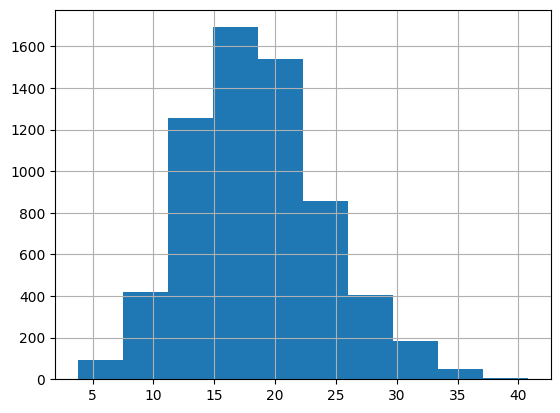

In [163]:
with_subscriptions.duration.hist()

In [165]:
with_subscriptions.duration.describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

<AxesSubplot: >

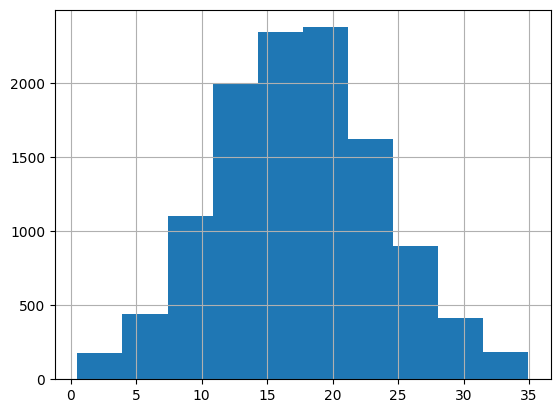

In [166]:
without_subscriptions.duration.hist()

распределения выборок похожи на нормальное, используем просто среднее значение

In [167]:
print('Среднее время для пользователей с подпиской:', with_subscriptions.duration.mean())
print('Среднее время для пользователей без подписки:', without_subscriptions.duration.mean())

Среднее время для пользователей с подпиской: 18.54198516280583
Среднее время для пользователей без подписки: 17.39090929866399


In [168]:
import scipy.stats as st

# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(with_subscriptions.duration, without_subscriptions.duration, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


<font color='red'>Вывод</font>: разница в средних значениях времени статистически значима, поэтому есть основания полагать что выборочное среднее времени использования самокатов у пользователей с подпиской все-таки больше, чем у пользователей без подписки

##### 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. 

Проверим, можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров


<font color='red'>Нулевая гипотеза:</font> пользователи с подпиской проезжают в среднем 3130

<font color='green'>Альтернативная:</font> пользователям с подпиской проезжают больше 3130 метров

In [173]:
interested_value = 3130 # такое расстояние является оптимальным

alpha = 0.05 # уровень статистической значимости


results = st.ttest_1samp(
    with_subscriptions.distance, 
    interested_value,
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:              # тут вытаскиваем значение p-value 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


<font color='red'>Вывод</font>: отличие среднего значения от ожидаемого среднего в большую сторону статистически незначимо, поэтому есть основания полагать что выборочное среднее дистанции, которую преодолевают пользователи самокатов с подпиской все-таки меньше, чем 3130 метров


##### 6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.


<font color='red'>Нулевая гипотеза:</font> помесячная выручка пользователей с подпиской равна аналогичной выручке от пользователей без подписки

<font color='green'>Альтернативная:</font> помесячная выручка пользователей с подпиской выше, чем от пользователей без подписки

Сначала немного доработаем датасет с данными о потраченных пользователем денег - добавим в него столбец с данными о наличии подписки

In [182]:
users_total_df=  users_total_df.merge(users_df, how='left', on='user_id')\
    [['user_id', 'month', 'tot_dist', 'tot_rides', 'tot_duration',
       'money_spent', 'subscription_type']]

In [183]:
users_total_df.head()

,user_id,month,tot_dist,tot_rides,tot_duration,money_spent,subscription_type
0,1,1,7027,2,42,451,ultra
1,1,4,754,1,7,241,ultra
2,1,8,6723,2,45,469,ultra
3,1,10,5809,2,32,391,ultra
4,1,11,7003,3,54,523,ultra


Теперь считаем средние значения для пользователей с подпиской и без

In [185]:
print('Среднее помесячных трат для пользователей с подпиской:', 
      users_total_df.query('subscription_type == "ultra"').money_spent.mean())

print('Среднее помесячных трат для пользователей без подписки:', 
      users_total_df.query('subscription_type == "free"').money_spent.mean())

Среднее помесячных трат для пользователей с подпиской: 361.48180013236265
Среднее помесячных трат для пользователей без подписки: 325.84289496910856


In [186]:

# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(users_total_df.query('subscription_type == "ultra"').money_spent, 
                       users_total_df.query('subscription_type == "free"').money_spent, 
                       alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 2.8130926188487286e-35
Отвергаем нулевую гипотезу


<font color='red'>Вывод</font>: отличие среднего значения помесячных затрат для пользователей с подпиской от аналогичного для пользователей без подписки в большую сторону статистически значимо, поэтому есть основания полагать что выборочное среднее таких затрат для пользователи самокатов с подпиской все-таки больше.


##### 6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. 

Команда надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 

Какой тест вам понадобился бы для проверки этой гипотезы?

<font color='red'>Решение:</font>

Это классический случай проверки гипотезы о равенстве средних для зависимых (парных) выборок. 

Данные по пользователям идентичны за исключением того факта, что на сервере произошло обновление. Значит генеральная совокупность та же, но с изменением.

Стоит применять метод st.ttest_rel(before, after, alternative= 'less')

##### <font color='red'>Общий вывод по разделу 6:</font>

1) Пользователи с подпиской тратят больше времени на поездку, чем пользователи без подписки

2) Пользователей с подпиской чаще всего проезжают оптимамальное расстояние с точки зрения износа самоката - не более 3130 метров

3) Пользователи с подпиской приносят больше помесячной прибыли, чем пользователи без подписки



#### <font color='red'>Итоговые выводы по проекту:</font>

1) Данные в целом в порядке, были обнаружены явные дубликаты в таблице с информацией о пользователях. почищены. Данные подходят для анализа

2) Исследовательский анализ данных показал, что:

- Большинство пользователей в Екатеринбурге и Пятигорске, меньше всего - в Москве. Стоит задуматься об увеличении числа самокатов или рекламе/продвижении сервиса в столице

- Пользователей без подписки немного больше - стоит привлекать дополнительных лояльных клиентов. Возможно, скидки или выгодные тарифы. Сделать рассылку, описать преимущества. Проводить акции "приведи друга" для тех, кто уже владеет подпиской

- Возраст пользователей - ожидаемо, молодежь от 18 до 30. Причем, основная масса - от 22 до 27. Возмонжо, стоит поработать с "пограничниками" от 18 до 22 и от 27 до 30. А также задуматься как привлечь людей постарше (выше платежеспособность, чем у подростков).

- длительность дистанций - чаще всего в пределах 2-4 км. Время использования - чаще всего от 11 до 22 минут. Величины однозначно взаимосвязаны. Как вариант - подумать над тарифами более длительного использования (или при достижении большого расстояния) - например, снижать стоимость использования с 20 минуты, повышая желание пользователя продолжать использование самоката. По расстоянию: более 4 км - снижать стоимость

3) Статистический анализ показал, что:

- Пользователи с подпиской тратят больше времени на поездку, чем пользователи без подписки

- Пользователей с подпиской чаще всего проезжают оптимамальное расстояние с точки зрения износа самоката - не более 3130 метров

- Пользователи с подпиской приносят больше помесячной прибыли, чем пользователи без подписки


<font color='green'>**Итоговое резюме аналитика:**</font>  привлечение пользователей с целью оформления подписки - рекомендуется.

дополнительная инфографика по выводам по [ссылке](https://www.youtube.com/watch?v=dQw4w9WgXcQ)



#### Шаг 7. Распределения

прошу проверить все, что выше, потому что это необязательное задание, а год кончается :-) 

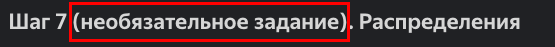